# Removing Trends - Lab

## Introduction

In this lab, you'll practice your detrending skills!

## Objectives

You will be able to:
* Learn how to remove trends and seasonality
* Use a log transformation to minimize non-stationarity
* Use rolling means to reduce non-stationarity
* Use differencing to reduce non-stationarity

## Detrending the Airpassenger data

In [29]:
# Import necessary libraries
import pandas as pd
from pandas import Series
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
# Import passengers.csv and set it as a time-series object. Plot the TS

df = pd.read_csv('passengers.csv')
index = pd.DatetimeIndex(df.Month)
dfseries = pd.Series(df['#Passengers'].values ,index=index)
dfseries.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
dtype: int64

## Create a stationarity check

At this stage, we can use the code from previous labs to create a function `stationarity_check(ts)` that takes in a time series object and performs stationarity checks including rolling statistics and the Dickey Fuller test. 

We want the output of the function to:
- Plot the original time series along with the rolling mean and rolling standard deviation in one plot
- Output the results of the Dickey-Fuller test

In [75]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab

def stationarity_check(ts):
    dftest = adfuller(ts)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    df_mean = ts.rolling(window=12, center=False).mean()
    df_std = ts.rolling(window=12, center=False).std()
    fig = plt.figure()
    plt.plot(ts, color='blue',label='Original')
    plt.plot(df_mean, color='red', label='Rolling Mean')
    plt.plot(df_std, color='black', label = 'Rolling Std')
    plt.legend()
    
    print(dfoutput)



Use your newly created function on the airpassenger data set.

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


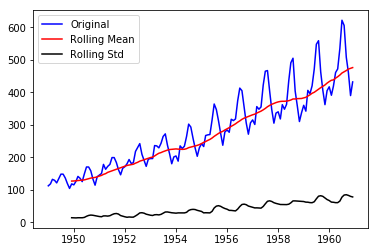

In [76]:
# Code here
stationarity_check(dfseries)

## Perform a log() and sqrt() transform

In [55]:
# Log transform timeseries and compare with original to check the effect
df_log = pd.Series(np.log(df['#Passengers'].values), index=index)
df_sqrt = pd.Series(np.sqrt(df['#Passengers'].values), index=index)

moving forward, let's keep working with the log transformed data before subtracting rolling mean, differencing, etc.

## Subtracting the rolling mean

Create a rolling mean using your log transformed time series, with a time window of 7. Plot the log-transformed time series and the rolling mean together.

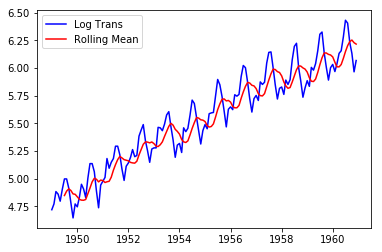

In [56]:
# your code here
dflog_rm = df_log.rolling(window=7, center=False).mean()
fig = plt.figure()
plt.plot(df_log, color='blue',label='Log Trans')
plt.plot(dflog_rm, color='red', label='Rolling Mean')
plt.legend()

Now, subtract the rolling mean from the time series, look at the 10 first elements of the result and plot the result.

In [70]:
# Subtract the moving average from the original data and check head for Nans
df_subrm = df_log - dflog_rm

In [71]:
# Drop the NaN values from timeseries calculated above
df_subrm = df_subrm[df_subrm.isnull()==False]
df_subrm

Month
1949-07-01    0.150059
1949-08-01    0.110242
1949-09-01    0.005404
1949-10-01   -0.113317
1949-11-01   -0.217275
1949-12-01   -0.087394
1950-01-01   -0.090241
1950-02-01    0.024099
1950-03-01    0.143499
1950-04-01    0.101068
1950-05-01    0.017080
1950-06-01    0.141347
1950-07-01    0.221040
1950-08-01    0.165202
1950-09-01    0.059668
1950-10-01   -0.104233
1950-11-01   -0.234230
1950-12-01   -0.044976
1951-01-01   -0.005997
1951-02-01    0.045785
1951-03-01    0.210364
1951-04-01    0.117880
1951-05-01    0.134889
1951-06-01    0.105523
1951-07-01    0.166807
1951-08-01    0.121582
1951-09-01    0.014028
1951-10-01   -0.099857
1951-11-01   -0.188111
1951-12-01   -0.054658
                ...   
1958-07-01    0.267725
1958-08-01    0.239323
1958-09-01   -0.018016
1958-10-01   -0.134919
1958-11-01   -0.265151
1958-12-01   -0.171023
1959-01-01   -0.077967
1959-02-01   -0.077599
1959-03-01    0.125116
1959-04-01    0.103034
1959-05-01    0.139456
1959-06-01    0.196122
1959-

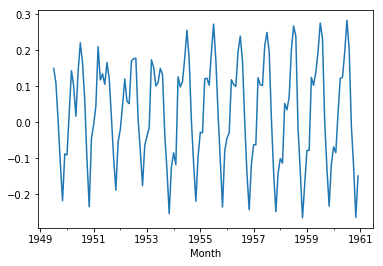

In [72]:
# Plot the result
df_subrm.plot()

Finally, use your function `check_stationarity` to see if this series is considered stationary!

Test Statistic                  -2.348027
p-value                          0.156946
#Lags Used                      14.000000
Number of Observations Used    123.000000
Critical Value (1%)             -3.484667
Critical Value (5%)             -2.885340
Critical Value (10%)            -2.579463
dtype: float64


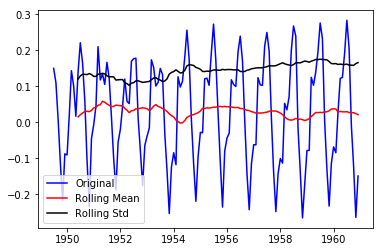

In [77]:
# Your code here
stationarity_check(df_subrm)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?
almost stationary. pvalue low, but not super low. tstat around 10% crit, but not lower than it

## Subtracting the weighted rolling mean

Repeat all the above for the *weighter* rolling mean. Start from the log-transformed data again. Compare the Dickey-Fuller Test results. What do you conclude?

In [10]:
# Use Pandas ewma() to calculate Weighted Moving Average of ts_log
df_ewma = 

# Plot the original data with exp weighted average


In [11]:
# Subtract the moving average from the original data and plot

In [12]:
# do a stationarity check

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


## Differencing

Using exponentially weighted moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now use differencing to remove seasonality. Make sure you use the right amount of `periods`. Start from the log-transformed, exponentially weighted rolling mean-subtracted series.

After you differenced the series, run the `stationarity check` again.

In [13]:
# difference your data and look at the head

In [14]:
# plot your differenced time series

In [15]:
# drop nas

In [16]:
# perform the stationarity check

### Your conclusion

## Summary 

In this lab, you learned how to make time series stationary through using log transforms, rolling means and differencing.